## 분산 분석표

ANOVA 분석 결과 분산 분석표는 다음과 같이 표시할 수 있다.

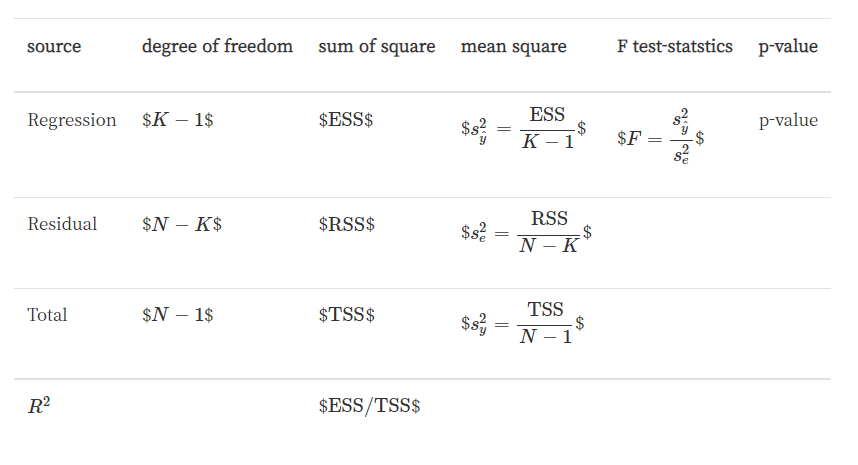

출처: 데이터사이언스 스쿨

K : 모수의 갯수 (독립변수의 갯수 + 상수항)

N : 데이터의 갯수

아래는 회귀분석용 데이터를 생성해 회귀분석을 진행한 결과이다.

In [4]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           6.60e-24
Time:                        13:20:53   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

위의 회귀분석 결과 외에도 ANOVA 분석을 통한 분산분석표를 사용하는 이유는 다음과 같다.

위 회귀분석 결과 레포트에서 F-test의 유의확률을 확인할 수 있다. 

여기서 F-test는 모든 계수값이 0이라는 귀무가설을 이용한다.

$$H_0 : w_1 = w_2 = w_{K-1} = 0$$

즉, 귀무가설을 채택하는 유의확률이 나오는 모델이라면 모든 독립변수가 $y$값에 영향을 미치지 않는 경우를 의미한다.

하지만 현실적으로 이러한 경우는 의도하지 않는 한 발생하기 쉽지 않다. 따라서 F-test 결과 어느정도의 유의확률로 귀무가설을 기각했는지를 통해 모델의 성능을 짐작할 수 있는 지표가 된다.

분산분석의 귀무가설은 결정계수 $R^2$가 0이기에 사실상 F-test와 같은 귀무가설이라는 것을 알 수 있다.

$$H_0 : R^2 = 0$$

분산분석표에서 확인 가능한 $\dfrac{ESS}{K-1}, \dfrac{RSS}{N-K}$는 카이제곱분포를 따르는데 이 두 분포를 이용하여 구한 비율은 $F$분포를 따르게 된다.

$$\dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} \sim F(K-1, N-K)$$

이렇게 구해진 값을 $F$검정의 검정통계량으로 사용할 수 있는데 이는 summary 레포트의 F-test p-value와 동일한 것을 확인할 수 있다.

In [6]:
# 분산분석표 생성

import scipy.stats

sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


X 의 1이라는 값은 $K-1$이다.

Residual의 98이라는 값은 $N-K$이다.

X의 sum_sq는 $ESS$이다.

Residual의 sum_sq는 $RSS$이다.

위 분산분석표의 F-검정 유의확률과 아래의 회귀분석 레포트의 F-검정 유의확률값이 같은 것을 확인할 수 있다.

In [7]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           6.60e-24
Time:                        13:33:35   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

## F검정을 이용한 모형 비교

F검정을 이용하면 다음과 같은 포함관계의 두 모형의 성능을 비교할 수 있다.

- Full Model : $y = w_0 + w_1x_1 + w_2x_2 + w_3x_3$
- Reduced Model : $y = w_0 + w_1x_1$

여기서 귀무가설은 다음과 같다.

$$H_0 : w_2 = w_3 = 0$$

즉, 귀무가설을 채택한다면 Full Model이나 Reduced Model이나 실질적으로 같은 모델임을 의미하며 $w_2, w_3$는 사실 영양가가 없는 회귀계수라는 말이 된다.

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [9]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

# anova_lm을 이용해 두 모델을 fit()
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


full 모델에는 boston데이터의 모든 독립변수를, reduced 모델에는 t-검정으로 확인했던 실질적으로 타겟값에 영향을 미치지 않았던 INDUS, AGE를 제외하고 회귀분석 모델을 생성한다.

위 결과를 확인해보면 F-검정을 통한 유의확률이 0.944로 매우 높은 값을 가지며 귀무가설을 채택한다.

즉, 두 모델은 사실상 같다는 것을 의미하며 INDUS, AGE는 사실상 제외해도 되는 독립변수라는 결론을 내릴 수 있다.

이처럼 F-검정을 이용한 모형비교를 통해 여러개의 독립변수를 한번에 제외할 때 anova_lm() 메소드를 사용할 수 있다.

## F검정을 사용한 변수 중요도 비교

회귀분석시 독립변수가 많아지면 많아질수록 다중공선성 문제에 빠지기 쉽다. 이러한 문제를 방지하기 위해 변수 제외가 필요한데 F-검정을 통해 변수중요도가 낮은 변수를 우선적으로 제외할 수 있다.

아래의 경우 F-검정을 이용해 full model에는 모든 독립변수를, reduced model에는 CRIM을 제외한 독립변수를 지정하고 두 모델의 성능을 비교한 것이다.

이 경우 간접적으로 각 독립변수의 영향력을 측정하는 효과가 발생하며 아래의 검정 결과는 CRIM 변수의 중요도로 해석할 수 있다.

In [10]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


`anova_lm()`메소드에서 `typ` 파라미터를 2로 지정하면 모든 변수에 대해 F 검정값을 한번에 계산한다.

결과적으로는 단일계수 t검정의 유의확률과 동일하지만 result 객체의 summary보다 자세한 수치를 비교할 수 있기 때문이다.

In [11]:
model_boston = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12


reference : 데이터사이언스 스쿨